In [3]:
#simple direct problem solving 

import matplotlib.pyplot as plt

from solution_global_wip import Solution
from basis import Basis
import itertools
import numpy as np

a = 1
b = 1

eps = 0.01

beta = 0.2
gamma = 0.15


power = 5
params = {
    'n_dims': 2,
    'dim_sizes': np.array([6, 6]),
    'area_lims': np.array([[0,1], [0,1]]),
    'power': power,
    'basis': Basis(power),
    'n_funcs': 6,
}
sol = Solution(**params)
w = np.sqrt(2) #(sol.steps[0]/2)
# w = 1/sol.steps[0]
k1 = 50
k2 = 5
border_weight = sol.steps[0]**(-1) * 100
no_need_weight = 0
# border_weight = 100

w = 1#np.sqrt(2) #(sol.steps[0]/2)
# w = 1/sol.steps[0]
k1 = 1#50
k2 = 1#5
border_weight = 1 # sol.steps[0]**(-1) * 100
no_need_weight = 0


def f_collocation_points(N):
    points = np.zeros(N+1)
    h = 2/(N+1)
    points[0] = -1 + h/2
    for i in range(1, N+1):
        points[i] = points[i-1] + h
    return np.array(points).reshape(N+1,1)

# c_p_1d = f_collocation_points(int(np.ceil(power/2))).reshape(int(np.ceil(power/2))+1)
# power = int(3/2*power)
c_p_1d = f_collocation_points(power).reshape(power+1)

colloc_points = np.array(list(itertools.product(c_p_1d, c_p_1d)))


connect_points = np.array([[-1, 0.5], [1, 0.5],
                            [0.5, -1], [0.5, 1],
                            [-1, -0.5], [1, -0.5],
                            [-0.5, -1], [-0.5, 1],])
                            
border_points = connect_points

colloc_left_operators = [lambda u_loc, u_bas, x, x_loc:  (u_bas([1,0],0)-eps*u_bas([0,2],0) #s
                                                                                            + beta * (u_bas([0,0],0)*u_loc([0,0],1)
                                                                                                    + u_loc([0,0],0)*u_bas([0,0],1))
                                                                                            -(u_bas([0,1],0)*u_loc([0,1],3)+
                                                                                              u_loc([0,1],0)*u_bas([0,1],3)+

                                                                                             u_loc([0,0],0)*u_bas([0,2],3)+
                                                                                             u_bas([0,0],0)*u_loc([0,2],3))
                                                                                          ) * w**2,
                        lambda u_loc, u_bas, x, x_loc:  (u_bas([1,0],1)-eps*u_bas([0,2],1) #i
                                                                                            - beta * (u_bas([0,0],0)*u_loc([0,0],1)
                                                                                                     +u_loc([0,0],0)*u_bas([0,0],1))
                                                                                            + gamma * u_bas([0,0],1)
                                                                                            -(u_bas([0,1],1)*u_loc([0,1],4)+
                                                                                              u_loc([0,1],1)*u_bas([0,1],4)+

                                                                                             u_loc([0,0],1)*u_bas([0,2],4)+
                                                                                             u_bas([0,0],1)*u_loc([0,2],4))
                                                                                          ) * w**2,
                        lambda u_loc, u_bas, x, x_loc:  (u_bas([1,0],2)-eps*u_bas([0,2],2) #r
                                                                                            - gamma * u_bas([0,0],1)
                                                                                            -(u_bas([0,1],2)*u_loc([0,1],5)+
                                                                                              u_loc([0,1],2)*u_bas([0,1],5)+

                                                                                             u_loc([0,0],2)*u_bas([0,2],5)+
                                                                                             u_bas([0,0],2)*u_loc([0,2],5))
                                                                                          ) * w**2,



                        lambda u_loc, u_bas, x, x_loc:  (-u_bas([1,0],3)-eps*u_bas([0,2],3)
                                                                                            + beta * (u_loc([0,0],1) * (u_bas([0,0],3) - u_bas([0,0],4))
                                                                                                        + u_bas([0,0],1) * (u_loc([0,0],3) - u_loc([0,0],4)))
                                                                                             +(u_bas([0,1],3)*u_loc([0,1],3))
                                                                                            ) * w**2 ,
                        lambda u_loc, u_bas, x, x_loc:  (-u_bas([1,0],4)-eps*u_bas([0,2],4)
                                                                                            + beta * (u_loc([0,0],0) * (u_bas([0,0],3) - u_bas([0,0],4))
                                                                                                        + u_bas([0,0],0) * (u_loc([0,0],3) - u_loc([0,0],4)))
                                                                                            + gamma * (u_bas([0,0],4) - u_bas([0,0],5)) 
                                                                                            +(u_bas([0,1],4)*u_loc([0,1],4))
                                                                                            ) * w**2 ,
                        lambda u_loc, u_bas, x, x_loc:  (-u_bas([1,0],5)-eps*u_bas([0,2],5)
                                                                                            # - gamma * (u_bas([0,0],4) - u_bas([0,0],5))
                                                                                             +(u_bas([0,1],5)*u_loc([0,1],5))
                                                                                            ) * w**2 ,

                                                                                            ]

                                            

def popravka(f,g):
    return f*g
colloc_right_operators = [lambda u_loc, u_nei, x, x_loc: (-popravka(u_loc([0,1],0), u_loc([0,1],3)) - popravka(u_loc([0,0],0), u_loc([0,2],3))
                                                         + popravka(u_loc([0,0],0), u_loc([0,0],1))) * w**2,  #2*u_loc([0,0],0)*u_loc([0,1],1)**2 * w**2, #0, 
                            lambda u_loc, u_nei, x, x_loc: (-popravka(u_loc([0,1],1), u_loc([0,1],4)) - popravka(u_loc([0,0],1), u_loc([0,2],4))
                                                         + popravka(u_loc([0,0],0), u_loc([0,0],1))) * w**2,  #2*u_loc([0,0],0)*u_loc([0,1],1)**2 * w**2, #0, 
                            lambda u_loc, u_nei, x, x_loc: (-popravka(u_loc([0,1],2), u_loc([0,1],5)) - popravka(u_loc([0,0],2), u_loc([0,2],5))) * w**2,  #2*u_loc([0,0],0)*u_loc([0,1],1)**2 * w**2, #0, 

                          lambda u_loc, u_nei, x, x_loc: (popravka(u_loc([0,0],1),  (u_loc([0,0],3) - u_loc([0,0],4)))) * w**2,
                          lambda u_loc, u_nei, x, x_loc: -(popravka(u_loc([0,0],0),  (u_loc([0,0],3) - u_loc([0,0],4)))) * w**2,
                          lambda u_loc, u_nei, x, x_loc: 0,
                          
                          ]
colloc_ops = [colloc_left_operators, colloc_right_operators]


def initial_state(x):
    t, x = x
    sm_x = 3*x-1
    if (x<2/3 and x>1/3):
        return np.array([0.97, 0.02, 0.01]) * 3 * 12 * (sm_x**2) *(1-sm_x)
    else:
        return np.array([0,0,0])

def terminal_state(x):
    sm_x = 3*x-1
    if (x<2/3 and x>1/3):
        return np.array([0.5, 0., 0.5])* 12*sm_x*(1-sm_x)**2 *3
    else:
        return [0,0,0]

small = 1e-5

# border_left_operators = [lambda _, u_bas, x, x_loc: int(x[0]>sol.area_lims[0,0]+small)*int(x[0]<sol.area_lims[0,1]-small)*(u_bas([0,0],1)) * border_weight,
                         
#                         lambda _, u_bas, x, x_loc: int(x[0]>sol.area_lims[0,1]-small)*(u_bas([0,0],1)-u_bas([0,0],0)) * border_weight,
                         
#                         lambda _, u_bas, x, x_loc: int(x[0]<sol.area_lims[0,1]-small)*u_bas([0,0],0) * border_weight,
#                             ]

border_left_operators = [
    #s_PSI border conditions
    lambda _, u_bas, x, x_loc: int(x[0]>sol.area_lims[0,0]+small)*int(x[0]<sol.area_lims[0,1]-small)*(u_bas([0,0],3)) * border_weight,
    #i_PSI border conditions
    lambda _, u_bas, x, x_loc: int(x[0]>sol.area_lims[0,0]+small)*int(x[0]<sol.area_lims[0,1]-small)*(u_bas([0,0],4)) * border_weight,
    #r_PSI border conditions
    lambda _, u_bas, x, x_loc: int(x[0]>sol.area_lims[0,0]+small)*int(x[0]<sol.area_lims[0,1]-small)*(u_bas([0,0],5)) * border_weight,
                         
    # lambda _, u_bas, x, x_loc: int(x[0]>sol.area_lims[0,1]-small)*(u_bas([0,0],3)-u_bas([0,0],0)) * border_weight, #* no_need_weight,
    lambda _, u_bas, x, x_loc: int(x[0]>sol.area_lims[0,1]-small)*(u_bas([0,0],3)) * border_weight, #* no_need_weight,
    lambda _, u_bas, x, x_loc: int(x[0]>sol.area_lims[0,1]-small)*(u_bas([0,0],4)-u_bas([0,0],1)) * border_weight,
    # lambda _, u_bas, x, x_loc: int(x[0]>sol.area_lims[0,1]-small)*(u_bas([0,0],5)-u_bas([0,0],2)) * border_weight, #* no_need_weight,
    lambda _, u_bas, x, x_loc: int(x[0]>sol.area_lims[0,1]-small)*(u_bas([0,0],5)) * border_weight, #* no_need_weight,
            
    lambda _, u_bas, x, x_loc: int(x[0]<sol.area_lims[0,1]-small)*u_bas([0,0],0) * border_weight,
    lambda _, u_bas, x, x_loc: int(x[0]<sol.area_lims[0,1]-small)*u_bas([0,0],1) * border_weight,
    lambda _, u_bas, x, x_loc: int(x[0]<sol.area_lims[0,1]-small)*u_bas([0,0],2) * border_weight,
    ]

border_right_operators = [
    lambda u, _, x, x_loc: 0 * border_weight, # border condition for psi-s
    lambda u, _, x, x_loc: 0 * border_weight, # border condition for psi-s
    lambda u, _, x, x_loc: 0 * border_weight, # border condition for psi-s
                            
    # terminal conditions for psis
    lambda u, _, x, x_loc: int(x[0]>sol.area_lims[0,1]-small) * (-terminal_state(x[1])[0]) * border_weight * no_need_weight,
    lambda u, _, x, x_loc: int(x[0]>sol.area_lims[0,1]-small) * (-terminal_state(x[1])[1]) * border_weight,
    lambda u, _, x, x_loc: int(x[0]>sol.area_lims[0,1]-small) * (-terminal_state(x[1])[2]) * border_weight * no_need_weight,
                            
    lambda u, _, x, x_loc: int(x[0]<sol.area_lims[0,1]-small)*initial_state(x)[0] * border_weight, # border and initial cond for s
    lambda u, _, x, x_loc: int(x[0]<sol.area_lims[0,1]-small)*initial_state(x)[1] * border_weight, # border and initial cond for i
    lambda u, _, x, x_loc: int(x[0]<sol.area_lims[0,1]-small)*initial_state(x)[2] * border_weight, # border and initial cond for r
]

border_ops = [border_left_operators, border_right_operators]

def f_collocation_points(N):
    points = np.zeros(N+1)
    h = 2/(N+1)
    points[0] = -1 + h/2
    for i in range(1, N+1):
        points[i] = points[i-1] + h
    return np.array(points).reshape(N+1,1)

c_p_1d = f_collocation_points(power).reshape(power+1)

colloc_points = np.array(list(itertools.product(c_p_1d, c_p_1d)))
connect_points = np.array([[-1, 0.5], [1, 0.5],
                            [0.5, -1], [0.5, 1],
                            [-1, -0.5], [1, -0.5],
                            [-0.5, -1], [-0.5, 1],
                            [-1, 0], [1, 0],
                            [0, -1], [0, 1],
                            ])
border_points = connect_points
points=[colloc_points, connect_points ,border_points]

connect_left_operators = []
connect_right_operators = []

def dir(point: np.array) -> np.array:
    direction = (np.abs(point) == 1) * (np.sign(point))
    return np.array(direction, dtype=int)
for func_num in range(sol.n_funcs):
    # connect_left_operators += [lambda _, u_bas, x, x_loc, func_num=func_num: u_bas(0*dir(x_loc),func_num) + np.sum(dir(x_loc))*int(abs(x_loc[1])==1)*u_bas([0,1],func_num)]
    # connect_right_operators += [lambda _, u_bas, x, x_loc, func_num=func_num: u_bas(0*dir(x_loc),func_num) -  np.sum(dir(x_loc))*int(abs(x_loc[1])==1)*u_bas([0,1],func_num)]
    connect_left_operators += [lambda _, u_bas, x, x_loc, func_num=func_num: k1*u_bas(0*dir(x_loc),func_num) + k2*np.sum(dir(x_loc))*u_bas([0,1],func_num)]
    connect_right_operators += [lambda _, u_bas, x, x_loc, func_num=func_num: k1*u_bas(0*dir(x_loc),func_num) -  k2*np.sum(dir(x_loc))*u_bas([0,1],func_num)]
connect_ops = [connect_left_operators, connect_right_operators]

iteration_dict = {'points':points,
        'colloc_ops':colloc_ops,
        'border_ops':border_ops,
       'connect_ops':connect_ops
}

sol.cells_coefs *= 0.0


In [4]:
A, b = sol.global_solve(**iteration_dict, solver = 'np', return_system=True, calculate=False)

In [31]:
A, b = sol.global_solve(**iteration_dict, solver = 'np', return_system=True)

In [2]:
for i in range(10):
    A, b = sol.global_solve(**iteration_dict, solver = 'np', return_system=True)

KeyboardInterrupt: 

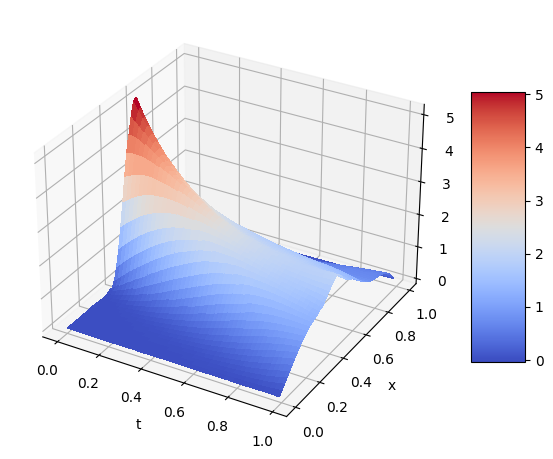

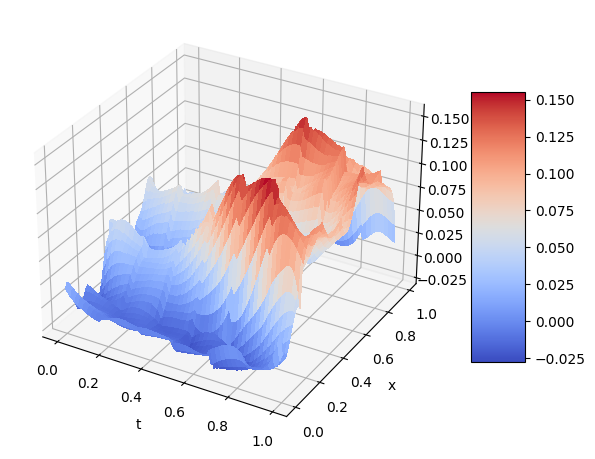

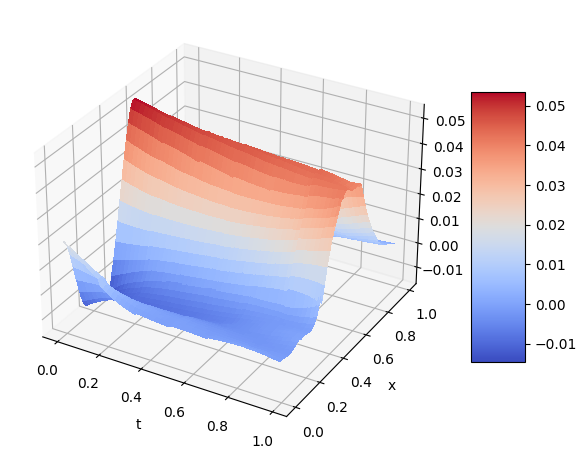

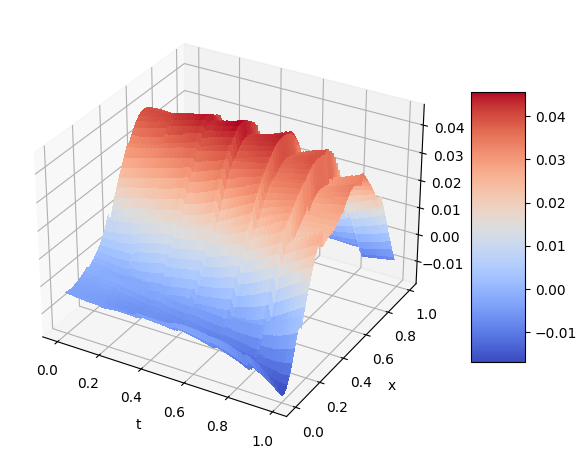

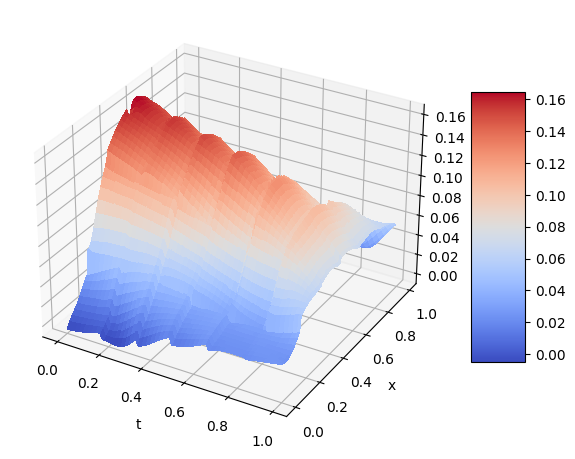

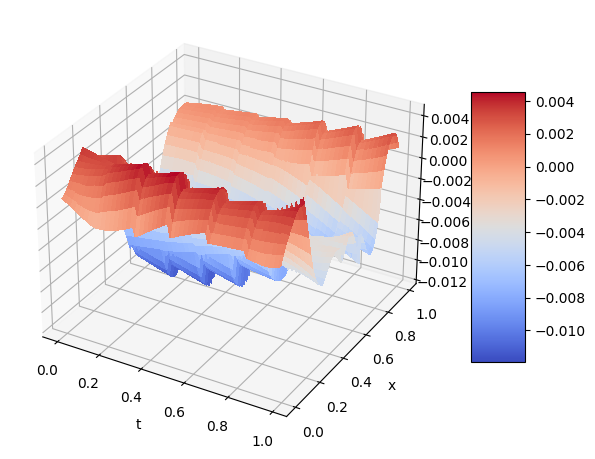

In [3]:
for i in range(6):
    sol.plot2d(func_num=i)

In [13]:
np.linalg.cond(A)

1955.2031511930024

In [16]:
np.linalg.cond(A)

1017.3116503829827

In [12]:
#simple direct problem solving 

import matplotlib.pyplot as plt

from solution_global_wip import Solution
from basis import Basis
import itertools
import numpy as np

a = 1
b = 1

eps = 0.01

beta = 0.2
gamma = 0.15


power = 5
params = {
    'n_dims': 2,
    'dim_sizes': np.array([6, 6]),
    'area_lims': np.array([[0,1], [0,1]]),
    'power': power,
    'basis': Basis(power),
    'n_funcs': 2,
}
sol = Solution(**params)
# w = np.sqrt(2) #(sol.steps[0]/2)
# # w = 1/sol.steps[0]
# k1 = 50
# k2 = 5
# border_weight = sol.steps[0]**(-1) * 100
# no_need_weight = 0
# # border_weight = 100

w = 1#np.sqrt(2) #(sol.steps[0]/2)
# w = 1/sol.steps[0]
k1 = 1#50
k2 = 1#5
border_weight = 1 # sol.steps[0]**(-1) * 100
no_need_weight = 0


def f_collocation_points(N):
    points = np.zeros(N+1)
    h = 2/(N+1)
    points[0] = -1 + h/2
    for i in range(1, N+1):
        points[i] = points[i-1] + h
    return np.array(points).reshape(N+1,1)

# c_p_1d = f_collocation_points(int(np.ceil(power/2))).reshape(int(np.ceil(power/2))+1)
# power = int(3/2*power)
c_p_1d = f_collocation_points(power).reshape(power+1)

colloc_points = np.array(list(itertools.product(c_p_1d, c_p_1d)))


connect_points = np.array([[-1, 0.5], [1, 0.5],
                            [0.5, -1], [0.5, 1],
                            [-1, -0.5], [1, -0.5],
                            [-0.5, -1], [-0.5, 1],])
                            
border_points = connect_points

colloc_left_operators = [lambda u_loc, u_bas, x, x_loc:  (u_bas([1,0],0)-eps*u_bas([0,2],0) #s
                                                                                            + beta * (                                                                                             u_loc([0,0],0)*u_bas([0,2],3)+
                                                                                             u_bas([0,0],0)*u_loc([0,2],1))
                                                                                          ) * w**2,




                        lambda u_loc, u_bas, x, x_loc:  (-u_bas([1,0],1)-eps*u_bas([0,2],1)
                                                                                            +(u_bas([0,1],1)*u_loc([0,1],1))
                                                                                            ) * w**2 ,

                                                                                            ]

                                            

def popravka(f,g):
    return f*g
colloc_right_operators = [lambda u_loc, u_nei, x, x_loc: (-popravka(u_loc([0,1],0), u_loc([0,1],1)) - popravka(u_loc([0,0],0), u_loc([0,2],1))
                                                         ) * w**2,  #2*u_loc([0,0],0)*u_loc([0,1],1)**2 * w**2, #0, 
                            
                          lambda u_loc, u_nei, x, x_loc: (popravka(u_loc([0,0],0),  u_loc([0,0],1) )) * w**2,
                          ]
colloc_ops = [colloc_left_operators, colloc_right_operators]


def initial_state(x):
    t, x = x
    sm_x = 3*x-1
    if (x<2/3 and x>1/3):
        return 12 * (sm_x**2) *(1-sm_x)
    else:
        return 0

def terminal_state(x):
    sm_x = 3*x-1
    if (x<2/3 and x>1/3):
        12*sm_x*(1-sm_x)**2
    else:
        return 0

small = 1e-5

# border_left_operators = [lambda _, u_bas, x, x_loc: int(x[0]>sol.area_lims[0,0]+small)*int(x[0]<sol.area_lims[0,1]-small)*(u_bas([0,0],1)) * border_weight,
                         
#                         lambda _, u_bas, x, x_loc: int(x[0]>sol.area_lims[0,1]-small)*(u_bas([0,0],1)-u_bas([0,0],0)) * border_weight,
                         
#                         lambda _, u_bas, x, x_loc: int(x[0]<sol.area_lims[0,1]-small)*u_bas([0,0],0) * border_weight,
#                             ]

border_left_operators = [
    #s_PSI border conditions
    lambda _, u_bas, x, x_loc: int(x[0]>sol.area_lims[0,0]+small)*int(x[0]<sol.area_lims[0,1]-small)*(u_bas([0,0],1)) * border_weight,
    #i_PSI border conditions
    # lambda _, u_bas, x, x_loc: int(x[0]>sol.area_lims[0,0]+small)*int(x[0]<sol.area_lims[0,1]-small)*(u_bas([0,0],4)) * border_weight,
    # #r_PSI border conditions
    # lambda _, u_bas, x, x_loc: int(x[0]>sol.area_lims[0,0]+small)*int(x[0]<sol.area_lims[0,1]-small)*(u_bas([0,0],5)) * border_weight,
                         
    # lambda _, u_bas, x, x_loc: int(x[0]>sol.area_lims[0,1]-small)*(u_bas([0,0],3)-u_bas([0,0],0)) * border_weight, #* no_need_weight,
    lambda _, u_bas, x, x_loc: int(x[0]>sol.area_lims[0,1]-small)*(u_bas([0,0],1)) * border_weight, #* no_need_weight,
    # lambda _, u_bas, x, x_loc: int(x[0]>sol.area_lims[0,1]-small)*(u_bas([0,0],4)-u_bas([0,0],1)) * border_weight,
    # lambda _, u_bas, x, x_loc: int(x[0]>sol.area_lims[0,1]-small)*(u_bas([0,0],5)-u_bas([0,0],2)) * border_weight, #* no_need_weight,
    # lambda _, u_bas, x, x_loc: int(x[0]>sol.area_lims[0,1]-small)*(u_bas([0,0],5)) * border_weight, #* no_need_weight,
            
    lambda _, u_bas, x, x_loc: int(x[0]<sol.area_lims[0,1]-small)*u_bas([0,0],0) * border_weight,
    # lambda _, u_bas, x, x_loc: int(x[0]<sol.area_lims[0,1]-small)*u_bas([0,0],1) * border_weight,
    # lambda _, u_bas, x, x_loc: int(x[0]<sol.area_lims[0,1]-small)*u_bas([0,0],2) * border_weight,
    ]

border_right_operators = [
    lambda u, _, x, x_loc: 0 * border_weight, # border condition for psi-s
    # lambda u, _, x, x_loc: 0 * border_weight, # border condition for psi-s
    # lambda u, _, x, x_loc: 0 * border_weight, # border condition for psi-s
                            
    # terminal conditions for psis
    lambda u, _, x, x_loc: int(x[0]>sol.area_lims[0,1]-small) * (-terminal_state(x[1])) * border_weight * no_need_weight,
    # lambda u, _, x, x_loc: int(x[0]>sol.area_lims[0,1]-small) * (-terminal_state(x[1])[1]) * border_weight,
    # lambda u, _, x, x_loc: int(x[0]>sol.area_lims[0,1]-small) * (-terminal_state(x[1])[2]) * border_weight * no_need_weight,
                            
    lambda u, _, x, x_loc: int(x[0]<sol.area_lims[0,1]-small)*initial_state(x) * border_weight, # border and initial cond for s
    # lambda u, _, x, x_loc: int(x[0]<sol.area_lims[0,1]-small)*initial_state(x)[1] * border_weight, # border and initial cond for i
    # lambda u, _, x, x_loc: int(x[0]<sol.area_lims[0,1]-small)*initial_state(x)[2] * border_weight, # border and initial cond for r
]

border_ops = [border_left_operators, border_right_operators]

def f_collocation_points(N):
    points = np.zeros(N+1)
    h = 2/(N+1)
    points[0] = -1 + h/2
    for i in range(1, N+1):
        points[i] = points[i-1] + h
    return np.array(points).reshape(N+1,1)

c_p_1d = f_collocation_points(power).reshape(power+1)

colloc_points = np.array(list(itertools.product(c_p_1d, c_p_1d)))
connect_points = np.array([[-1, 0.5], [1, 0.5],
                            [0.5, -1], [0.5, 1],
                            [-1, -0.5], [1, -0.5],
                            [-0.5, -1], [-0.5, 1],
                            # [-1, 0], [1, 0],
                            # [0, -1], [0, 1],
                            ])
border_points = connect_points
points=[colloc_points, connect_points ,border_points]

connect_left_operators = []
connect_right_operators = []

def dir(point: np.array) -> np.array:
    direction = (np.abs(point) == 1) * (np.sign(point))
    return np.array(direction, dtype=int)
for func_num in range(sol.n_funcs):
    # connect_left_operators += [lambda _, u_bas, x, x_loc, func_num=func_num: u_bas(0*dir(x_loc),func_num) + np.sum(dir(x_loc))*int(abs(x_loc[1])==1)*u_bas([0,1],func_num)]
    # connect_right_operators += [lambda _, u_bas, x, x_loc, func_num=func_num: u_bas(0*dir(x_loc),func_num) -  np.sum(dir(x_loc))*int(abs(x_loc[1])==1)*u_bas([0,1],func_num)]
    connect_left_operators += [lambda _, u_bas, x, x_loc, func_num=func_num: k1*u_bas(0*dir(x_loc),func_num) + k2*np.sum(dir(x_loc))*u_bas([0,1],func_num)]
    connect_right_operators += [lambda _, u_bas, x, x_loc, func_num=func_num: k1*u_bas(0*dir(x_loc),func_num) -  k2*np.sum(dir(x_loc))*u_bas([0,1],func_num)]
connect_ops = [connect_left_operators, connect_right_operators]

iteration_dict = {'points':points,
        'colloc_ops':colloc_ops,
        'border_ops':border_ops,
       'connect_ops':connect_ops
}

sol.cells_coefs *= 0.0


In [8]:
colloc_ops

[[<function __main__.<lambda>(u_loc, u_bas, x, x_loc)>,
  <function __main__.<lambda>(u_loc, u_bas, x, x_loc)>],
 [<function __main__.<lambda>(u_loc, u_nei, x, x_loc)>,
  <function __main__.<lambda>(u_loc, u_nei, x, x_loc)>]]

In [13]:
A, b = sol.global_solve(**iteration_dict, solver = 'np', return_system=True)

ValueError: could not broadcast input array from shape (25,) into shape (0,)

In [14]:
sol.n_funcs

2

In [19]:
#simple direct problem solving 

import matplotlib.pyplot as plt

from solution_global_wip import Solution
from basis import Basis
import itertools
import numpy as np

a = 1
b = 1

eps = 0.01

beta = 0.2
gamma = 0.15


power = 5
params = {
    'n_dims': 2,
    'dim_sizes': np.array([6, 6]),
    'area_lims': np.array([[0,1], [0,1]]),
    'power': power,
    'basis': Basis(power),
    'n_funcs': 4,
}
sol = Solution(**params)
w = np.sqrt(2) #(sol.steps[0]/2)
# w = 1/sol.steps[0]
k1 = 50
k2 = 2
border_weight = sol.steps[0]**(-1) * 100
no_need_weight = 0
# border_weight = 100

w = 1#np.sqrt(2) #(sol.steps[0]/2)
# w = 1/sol.steps[0]
k1 = 1#50
k2 = 1#5
border_weight = 1 # sol.steps[0]**(-1) * 100
no_need_weight = 0


def f_collocation_points(N):
    points = np.zeros(N+1)
    h = 2/(N+1)
    points[0] = -1 + h/2
    for i in range(1, N+1):
        points[i] = points[i-1] + h
    return np.array(points).reshape(N+1,1)

# c_p_1d = f_collocation_points(int(np.ceil(power/2))).reshape(int(np.ceil(power/2))+1)
# power = int(3/2*power)
c_p_1d = f_collocation_points(power).reshape(power+1)

colloc_points = np.array(list(itertools.product(c_p_1d, c_p_1d)))


connect_points = np.array([[-1, 0.5], [1, 0.5],
                            [0.5, -1], [0.5, 1],
                            [-1, -0.5], [1, -0.5],
                            [-0.5, -1], [-0.5, 1],])
                            
border_points = connect_points

colloc_left_operators = [lambda u_loc, u_bas, x, x_loc:  (u_bas([1,0],0)-eps*u_bas([0,2],0) #s
                                                                                            # + beta * (u_bas([0,0],0)*u_loc([0,0],1)
                                                                                            #         + u_loc([0,0],0)*u_bas([0,0],1))
                                                                                            -(u_bas([0,1],0)*u_loc([0,1],1)+
                                                                                              u_loc([0,1],0)*u_bas([0,1],1)+

                                                                                             u_loc([0,0],0)*u_bas([0,2],1)+
                                                                                             u_bas([0,0],0)*u_loc([0,2],1))
                                                                                          ) * w**2,
                        # lambda u_loc, u_bas, x, x_loc:  (u_bas([1,0],1)-eps*u_bas([0,2],1) #i
                        #                                                                     - beta * (u_bas([0,0],0)*u_loc([0,0],1)
                        #                                                                              +u_loc([0,0],0)*u_bas([0,0],1))
                        #                                                                     + gamma * u_bas([0,0],1)
                        #                                                                   ) * w**2,
                        # lambda u_loc, u_bas, x, x_loc:  (u_bas([1,0],2)-eps*u_bas([0,2],2) #r
                        #                                                                     - gamma * u_bas([0,0],1)
                        #                                                                   ) * w**2,



                        lambda u_loc, u_bas, x, x_loc:  (-u_bas([1,0],1)-eps*u_bas([0,2],1)
                                                                                             +(u_bas([0,1],1)*u_loc([0,1],1))
                                                                                            ) * w**2 ,
                                                                                            ]

                                            

def popravka(f,g):
    return f*g
colloc_right_operators = [lambda u_loc, u_nei, x, x_loc: (-popravka(u_loc([0,1],0), u_loc([0,1],1)) - popravka(u_loc([0,0],0), u_loc([0,2],1))
                                                         ) * w**2,  #2*u_loc([0,0],0)*u_loc([0,1],1)**2 * w**2, #0, 
                            # lambda u_loc, u_nei, x, x_loc: (0
                            #                              + popravka(u_loc([0,0],0), u_loc([0,0],1))) * w**2,  #2*u_loc([0,0],0)*u_loc([0,1],1)**2 * w**2, #0, 
                            # lambda u_loc, u_nei, x, x_loc: 0* w**2,  #2*u_loc([0,0],0)*u_loc([0,1],1)**2 * w**2, #0, 

                          lambda u_loc, u_nei, x, x_loc: (popravka(u_loc([0,0],0),  u_loc([0,0],1))) * w**2,
                          
                          ]
colloc_ops = [colloc_left_operators, colloc_right_operators]


def initial_state(x):
    t, x = x
    sm_x = 3*x-1
    if (x<2/3 and x>1/3):
        return np.array([0.97, 0.02, 0.01]) * 3 * 12 * (sm_x**2) *(1-sm_x)
    else:
        return np.array([0,0,0])

def terminal_state(x):
    sm_x = 3*x-1
    if (x<2/3 and x>1/3):
        return np.array([0.5, 0., 0.5])* 12*sm_x*(1-sm_x)**2 *3
    else:
        return [0,0,0]

small = 1e-5

# border_left_operators = [lambda _, u_bas, x, x_loc: int(x[0]>sol.area_lims[0,0]+small)*int(x[0]<sol.area_lims[0,1]-small)*(u_bas([0,0],1)) * border_weight,
                         
#                         lambda _, u_bas, x, x_loc: int(x[0]>sol.area_lims[0,1]-small)*(u_bas([0,0],1)-u_bas([0,0],0)) * border_weight,
                         
#                         lambda _, u_bas, x, x_loc: int(x[0]<sol.area_lims[0,1]-small)*u_bas([0,0],0) * border_weight,
#                             ]

border_left_operators = [
    #s_PSI border conditions
    lambda _, u_bas, x, x_loc: int(x[0]>sol.area_lims[0,0]+small)*int(x[0]<sol.area_lims[0,1]-small)*(u_bas([0,0],1)) * border_weight,
    #i_PSI border conditions
    # lambda _, u_bas, x, x_loc: int(x[0]>sol.area_lims[0,0]+small)*int(x[0]<sol.area_lims[0,1]-small)*(u_bas([0,0],4)) * border_weight,
    #r_PSI border conditions
    # lambda _, u_bas, x, x_loc: int(x[0]>sol.area_lims[0,0]+small)*int(x[0]<sol.area_lims[0,1]-small)*(u_bas([0,0],5)) * border_weight,
                         
    # lambda _, u_bas, x, x_loc: int(x[0]>sol.area_lims[0,1]-small)*(u_bas([0,0],3)-u_bas([0,0],0)) * border_weight, #* no_need_weight,
    lambda _, u_bas, x, x_loc: int(x[0]>sol.area_lims[0,1]-small)*(u_bas([0,0],1)) * border_weight, #* no_need_weight,
    # lambda _, u_bas, x, x_loc: int(x[0]>sol.area_lims[0,1]-small)*(u_bas([0,0],4)-u_bas([0,0],1)) * border_weight,
    # lambda _, u_bas, x, x_loc: int(x[0]>sol.area_lims[0,1]-small)*(u_bas([0,0],5)-u_bas([0,0],2)) * border_weight, #* no_need_weight,
    # lambda _, u_bas, x, x_loc: int(x[0]>sol.area_lims[0,1]-small)*(u_bas([0,0],5)) * border_weight, #* no_need_weight,
            
    lambda _, u_bas, x, x_loc: int(x[0]<sol.area_lims[0,1]-small)*u_bas([0,0],0) * border_weight,
    # lambda _, u_bas, x, x_loc: int(x[0]<sol.area_lims[0,1]-small)*u_bas([0,0],1) * border_weight,
    # lambda _, u_bas, x, x_loc: int(x[0]<sol.area_lims[0,1]-small)*u_bas([0,0],2) * border_weight,
    ]

border_right_operators = [
    lambda u, _, x, x_loc: 0 * border_weight, # border condition for psi-s
    # lambda u, _, x, x_loc: 0 * border_weight, # border condition for psi-s
    # lambda u, _, x, x_loc: 0 * border_weight, # border condition for psi-s
                            
    # terminal conditions for psis
    lambda u, _, x, x_loc: int(x[0]>sol.area_lims[0,1]-small) * (-terminal_state(x[1])[0]) * border_weight * no_need_weight,
    # lambda u, _, x, x_loc: int(x[0]>sol.area_lims[0,1]-small) * (-terminal_state(x[1])[1]) * border_weight,
    # lambda u, _, x, x_loc: int(x[0]>sol.area_lims[0,1]-small) * (-terminal_state(x[1])[2]) * border_weight * no_need_weight,
                            
    lambda u, _, x, x_loc: int(x[0]<sol.area_lims[0,1]-small)*initial_state(x)[0] * border_weight, # border and initial cond for s
    # lambda u, _, x, x_loc: int(x[0]<sol.area_lims[0,1]-small)*initial_state(x)[1] * border_weight, # border and initial cond for i
    # lambda u, _, x, x_loc: int(x[0]<sol.area_lims[0,1]-small)*initial_state(x)[2] * border_weight, # border and initial cond for r
]

border_ops = [border_left_operators, border_right_operators]

def f_collocation_points(N):
    points = np.zeros(N+1)
    h = 2/(N+1)
    points[0] = -1 + h/2
    for i in range(1, N+1):
        points[i] = points[i-1] + h
    return np.array(points).reshape(N+1,1)

c_p_1d = f_collocation_points(power).reshape(power+1)

colloc_points = np.array(list(itertools.product(c_p_1d, c_p_1d)))
connect_points = np.array([[-1, 0.5], [1, 0.5],
                            [0.5, -1], [0.5, 1],
                            [-1, -0.5], [1, -0.5],
                            [-0.5, -1], [-0.5, 1],
                            [-1, 0], [1, 0],
                            [0, -1], [0, 1],
                            ])
border_points = connect_points
points=[colloc_points, connect_points ,border_points]

connect_left_operators = []
connect_right_operators = []

def dir(point: np.array) -> np.array:
    direction = (np.abs(point) == 1) * (np.sign(point))
    return np.array(direction, dtype=int)
for func_num in range(sol.n_funcs):
    # connect_left_operators += [lambda _, u_bas, x, x_loc, func_num=func_num: u_bas(0*dir(x_loc),func_num) + np.sum(dir(x_loc))*int(abs(x_loc[1])==1)*u_bas([0,1],func_num)]
    # connect_right_operators += [lambda _, u_bas, x, x_loc, func_num=func_num: u_bas(0*dir(x_loc),func_num) -  np.sum(dir(x_loc))*int(abs(x_loc[1])==1)*u_bas([0,1],func_num)]
    connect_left_operators += [lambda _, u_bas, x, x_loc, func_num=func_num: k1*u_bas(0*dir(x_loc),func_num) + k2*np.sum(dir(x_loc))*u_bas([0,1],func_num)]
    connect_right_operators += [lambda _, u_bas, x, x_loc, func_num=func_num: k1*u_bas(0*dir(x_loc),func_num) -  k2*np.sum(dir(x_loc))*u_bas([0,1],func_num)]
connect_ops = [connect_left_operators, connect_right_operators]

iteration_dict = {'points':points,
        'colloc_ops':colloc_ops,
        'border_ops':border_ops,
       'connect_ops':connect_ops
}

sol.cells_coefs *= 0.0


In [24]:
A, b = sol.global_solve(**iteration_dict, solver = 'np', return_system=True)

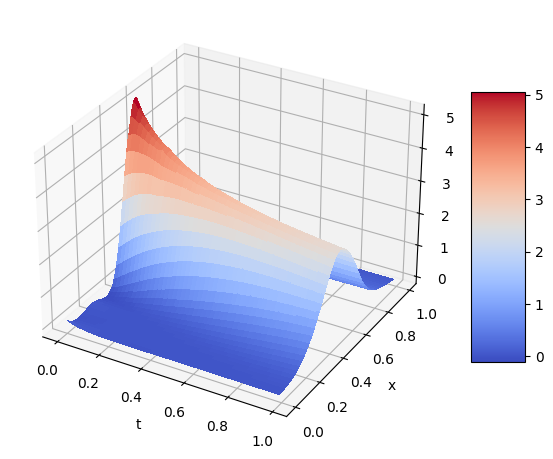

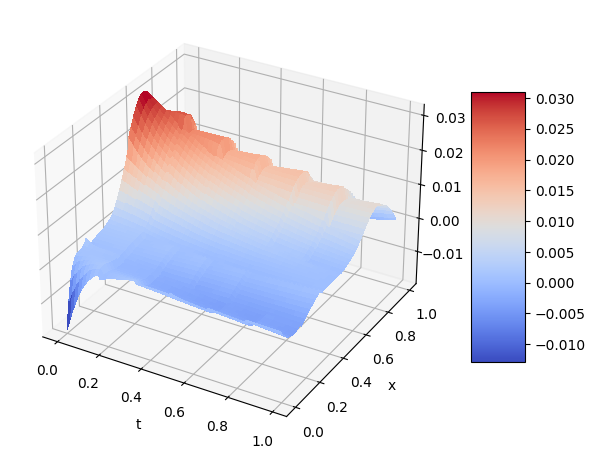

In [31]:
for i in range(2):
    sol.plot2d(func_num=i)

In [28]:
A, b = sol.global_solve(solver='np', svd_threshold=1e-8, return_system=True, alpha = 0.00, **iteration_dict)

In [30]:

        # print(i,' | ', np.max(np.abs(prev_eval - eval(sol))))
        #print('A cond', np.linalg.cond(A))

0  |  0.002764554045088463  |  0.0046509346678687
0  |  0.0029110710273808627  |  0.003627964876992351
0  |  0.0018330603696967707  |  0.002181074745444267
0  |  0.0015543741866821392  |  0.0019026088152189757
0  |  0.0017719042294321863  |  0.002246403716254619
0  |  0.0018105885185254467  |  0.0024435813952967678
0  |  0.0016952493730254536  |  0.002116706554808001
0  |  0.001666755639344042  |  0.00219326692958699
0  |  0.0017753130576221576  |  0.002278488970061776
0  |  0.0018150474440584707  |  0.0024502843962088683
1  |  0.0018640193472551359  |  0.002445935268499344
1  |  0.0019166084384275583  |  0.002568207589549232
1  |  0.0020080125034270813  |  0.00265712512174332
1  |  0.002088796273145288  |  0.002815291073060333
1  |  0.0021769638384350753  |  0.0029119304293678816
1  |  0.0022701337103838704  |  0.0030640296589803384
1  |  0.00237849281703692  |  0.0031944270420121157
1  |  0.0024886358603849468  |  0.003365584356003648


KeyboardInterrupt: 

In [7]:
#simple direct problem solving 

import matplotlib.pyplot as plt

from solution_global_wip import Solution
from basis import Basis
import itertools
import numpy as np

a = 1
b = 1

eps = 0.01

power = 5
params = {
    'n_dims': 2,
    'dim_sizes': np.array([6, 6]),
    'area_lims': np.array([[0,1], [0,1]]),
    'power': power,
    'basis': Basis(power),
    'n_funcs': 2,
}
sol = Solution(**params)

w = 1
k1 = 1
k2 = 1
border_weight = 1
no_need_weight = 0


def f_collocation_points(N):
    points = np.zeros(N+1)
    h = 2/(N+1)
    points[0] = -1 + h/2
    for i in range(1, N+1):
        points[i] = points[i-1] + h
    return np.array(points).reshape(N+1,1)

c_p_1d = f_collocation_points(power).reshape(power+1)

colloc_points = np.array(list(itertools.product(c_p_1d, c_p_1d)))


connect_points = np.array([[-1, 0.5], [1, 0.5],
                            [0.5, -1], [0.5, 1],
                            [-1, -0.5], [1, -0.5],
                            [-0.5, -1], [-0.5, 1],])
                            
border_points = connect_points

colloc_left_operators = [lambda u_loc, u_bas, x, x_loc:  (u_bas([1,0],0)-eps*u_bas([0,2],0)
                                                                                            -(u_bas([0,1],0)*u_loc([0,1],1)+
                                                                                              u_loc([0,1],0)*u_bas([0,1],1)+

                                                                                             u_loc([0,0],0)*u_bas([0,2],1)+
                                                                                             u_bas([0,0],0)*u_loc([0,2],1))
                                                                                          ) * w**2,

                        lambda u_loc, u_bas, x, x_loc:  (-u_bas([1,0],1)-eps*u_bas([0,2],1)
                                                                                             +(u_bas([0,1],1)*u_loc([0,1],1))
                                                                                            ) * w**2 ,
                                                                                            ]

def popravka(f,g):
    return f*g
colloc_right_operators = [lambda u_loc, u_nei, x, x_loc: (-popravka(u_loc([0,1],0), u_loc([0,1],1)) - popravka(u_loc([0,0],0), u_loc([0,2],1))
                                                         ) * w**2,
                          lambda u_loc, u_nei, x, x_loc: (popravka(u_loc([0,0],0),  u_loc([0,0],1))) * w**2,
                          ]
colloc_ops = [colloc_left_operators, colloc_right_operators]


def initial_state(x):
    t, x = x
    sm_x = 3*x-1
    if (x<2/3 and x>1/3):
        return 12 * (sm_x**2) *(1-sm_x)
    else:
        return 0

def terminal_state(x):
    sm_x = 3*x-1
    if (x<2/3 and x>1/3):
        return 12*sm_x*(1-sm_x)**2
    else:
        return 0

small = 1e-5

border_left_operators = [
    lambda _, u_bas, x, x_loc: int(x[0]>sol.area_lims[0,0]+small)*int(x[0]<sol.area_lims[0,1]-small)*(u_bas([0,0],1)) * border_weight,
    lambda _, u_bas, x, x_loc: int(x[0]>sol.area_lims[0,1]-small)*(u_bas([0,0],1)) * border_weight, #* no_need_weight,
    lambda _, u_bas, x, x_loc: int(x[0]<sol.area_lims[0,1]-small)*u_bas([0,0],0) * border_weight,
    ]

border_right_operators = [
    lambda u, _, x, x_loc: 0 * border_weight, # border condition for psi-s
    lambda u, _, x, x_loc: int(x[0]>sol.area_lims[0,1]-small) * (-terminal_state(x[1])) * border_weight * no_need_weight,
    lambda u, _, x, x_loc: int(x[0]<sol.area_lims[0,1]-small)*initial_state(x) * border_weight, # border and initial cond for s
]

border_ops = [border_left_operators, border_right_operators]

def f_collocation_points(N):
    points = np.zeros(N+1)
    h = 2/(N+1)
    points[0] = -1 + h/2
    for i in range(1, N+1):
        points[i] = points[i-1] + h
    return np.array(points).reshape(N+1,1)

c_p_1d = f_collocation_points(power).reshape(power+1)

colloc_points = np.array(list(itertools.product(c_p_1d, c_p_1d)))
connect_points = np.array([[-1, 0.5], [1, 0.5],
                            [0.5, -1], [0.5, 1],
                            [-1, -0.5], [1, -0.5],
                            [-0.5, -1], [-0.5, 1],
                            [-1, 0], [1, 0],
                            [0, -1], [0, 1],
                            ])
border_points = connect_points
points=[colloc_points, connect_points ,border_points]

connect_left_operators = []
connect_right_operators = []

def dir(point: np.array) -> np.array:
    direction = (np.abs(point) == 1) * (np.sign(point))
    return np.array(direction, dtype=int)
for func_num in range(sol.n_funcs):
    connect_left_operators += [lambda _, u_bas, x, x_loc, func_num=func_num: k1*u_bas(0*dir(x_loc),func_num) + k2*np.sum(dir(x_loc))*u_bas([0,1],func_num)]
    connect_right_operators += [lambda _, u_bas, x, x_loc, func_num=func_num: k1*u_bas(0*dir(x_loc),func_num) -  k2*np.sum(dir(x_loc))*u_bas([0,1],func_num)]
connect_ops = [connect_left_operators, connect_right_operators]

iteration_dict = {'points':points,
        'colloc_ops':colloc_ops,
        'border_ops':border_ops,
       'connect_ops':connect_ops
}

sol.cells_coefs *= 0.0



import copy
k=10
n=20
ts = np.linspace(params['area_lims'][0,0],params['area_lims'][0,1] - small, n)
xs = np.linspace(params['area_lims'][1,0],params['area_lims'][1,1] - small, n)



def eval(sol, ts=ts, xs=xs):
    res_array = np.zeros((len(ts), len(xs)))
    for i in range(len(ts)):
        t = ts[i]
        for j in range(len(xs)):
            x = xs[j]
            res_array[i,j] = sol.eval(np.array([t,x]), [0,0])
            
    return res_array

r = np.array((k *sol.cells_coefs.shape))
# for i in range(5):
# for j in range(k):
#     prev_eval = eval(sol)
#     prev_coefs = copy.deepcopy(sol.cells_coefs)
#     A, b = sol.global_solve(solver='np', svd_threshold=1e-8, return_system=True, alpha = 0.00, **iteration_dict)
#     print(j,' | ', np.max(np.abs(prev_coefs - sol.cells_coefs)),' | ', np.max(np.abs(prev_eval - eval(sol))))

In [11]:
A, b = sol.global_solve(solver='np', svd_threshold=1e-8, return_system=True, alpha = 0.00, calculate=False,**iteration_dict)
np.linalg.cond(A)

573.3490152122706

In [ ]:
params_to_save = copy.deepcopy(params)
params_to_save.pop('basis', None)
params_to_save['coefs'] = sol.cells_coefs
import json
from json import JSONEncoder
import numpy

class NumpyArrayEncoder(JSONEncoder):
    def default(self, obj):
        if isinstance(obj, numpy.ndarray):
            return obj.tolist()
        return JSONEncoder.default(self, obj)

with open('data.json', 'w') as f:
    json.dump(params_to_save, f, cls=NumpyArrayEncoder)

In [36]:
#simple direct problem solving 

import matplotlib.pyplot as plt

from solution_global_wip import Solution
from basis import Basis
import itertools
import numpy as np

a = 1
b = 1

eps = 0.01

power = 5
params = {
    'n_dims': 2,
    'dim_sizes': np.array([6, 6]),
    'area_lims': np.array([[0,0.1], [0,1]]),
    'power': power,
    'basis': Basis(power),
    'n_funcs': 2,
}
sol = Solution(**params)

w = 1
k1 = 1
k2 = 1
border_weight = 1
no_need_weight = 0


def f_collocation_points(N):
    points = np.zeros(N+1)
    h = 2/(N+1)
    points[0] = -1 + h/2
    for i in range(1, N+1):
        points[i] = points[i-1] + h
    return np.array(points).reshape(N+1,1)

c_p_1d = f_collocation_points(power).reshape(power+1)

colloc_points = np.array(list(itertools.product(c_p_1d, c_p_1d)))


connect_points = np.array([[-1, 0.5], [1, 0.5],
                            [0.5, -1], [0.5, 1],
                            [-1, -0.5], [1, -0.5],
                            [-0.5, -1], [-0.5, 1],])
                            
border_points = connect_points

colloc_left_operators = [lambda u_loc, u_bas, x, x_loc:  (u_bas([1,0],0)-eps*u_bas([0,2],0)
                                                                                            -(u_bas([0,1],0)*u_loc([0,1],1)+
                                                                                              u_loc([0,1],0)*u_bas([0,1],1)+

                                                                                             u_loc([0,0],0)*u_bas([0,2],1)+
                                                                                             u_bas([0,0],0)*u_loc([0,2],1))
                                                                                          ) * w**2,

                        lambda u_loc, u_bas, x, x_loc:  (-u_bas([1,0],1)-eps*u_bas([0,2],1)
                                                                                             +(u_bas([0,1],1)*u_loc([0,1],1))
                                                                                            ) * w**2 ,
                                                                                            ]

def popravka(f,g):
    return f*g
colloc_right_operators = [lambda u_loc, u_nei, x, x_loc: (-popravka(u_loc([0,1],0), u_loc([0,1],1)) - popravka(u_loc([0,0],0), u_loc([0,2],1))
                                                         ) * w**2,
                          lambda u_loc, u_nei, x, x_loc: (-popravka(u_loc([0,0],1),  u_loc([0,0],1))) * w**2,
                          ]
colloc_ops = [colloc_left_operators, colloc_right_operators]


def initial_state(x):
    t, x = x
    sm_x = 3*x-1
    if (x<2/3 and x>1/3):
        return 12 * (sm_x**2) *(1-sm_x)
    else:
        return 0

def terminal_state(x):
    sm_x = 3*x-1
    if (x<2/3 and x>1/3):
        return 12*sm_x*(1-sm_x)**2
    else:
        return 0

small = 1e-5

border_left_operators = [
    lambda _, u_bas, x, x_loc: int(x[0]>sol.area_lims[0,0]+small)*int(x[0]<sol.area_lims[0,1]-small)*(u_bas([0,0],1)) * border_weight,
    lambda _, u_bas, x, x_loc: int(x[0]<sol.area_lims[0,0]+small)*(u_bas([0,0],1)) * border_weight, #* no_need_weight,
    lambda _, u_bas, x, x_loc: int(x[0]>sol.area_lims[0,0]+small)*u_bas([0,0],0) * border_weight,
    ]

border_right_operators = [
    lambda u, _, x, x_loc: 0 * border_weight, # border condition for psi
    lambda u, _, x, x_loc: int(x[0]<sol.area_lims[0,0]+small) * (terminal_state(x[1])) * border_weight, #* no_need_weight,
    lambda u, _, x, x_loc: int(x[0]>sol.area_lims[0,0]+small) * initial_state(x) * border_weight, # border and initial cond for s
]

border_ops = [border_left_operators, border_right_operators]

def f_collocation_points(N):
    points = np.zeros(N+1)
    h = 2/(N+1)
    points[0] = -1 + h/2
    for i in range(1, N+1):
        points[i] = points[i-1] + h
    return np.array(points).reshape(N+1,1)

c_p_1d = f_collocation_points(power).reshape(power+1)

colloc_points = np.array(list(itertools.product(c_p_1d, c_p_1d)))
connect_points = np.array([[-1, 0.5], [1, 0.5],
                            [0.5, -1], [0.5, 1],
                            [-1, -0.5], [1, -0.5],
                            [-0.5, -1], [-0.5, 1],
                            [-1, 0], [1, 0],
                            [0, -1], [0, 1],
                            ])
border_points = connect_points
points=[colloc_points, connect_points ,border_points]

connect_left_operators = []
connect_right_operators = []

def dir(point: np.array) -> np.array:
    direction = (np.abs(point) == 1) * (np.sign(point))
    return np.array(direction, dtype=int)
for func_num in range(sol.n_funcs):
    connect_left_operators += [lambda _, u_bas, x, x_loc, func_num=func_num: k1*u_bas(0*dir(x_loc),func_num) + k2*np.sum(dir(x_loc))*u_bas([0,1],func_num)]
    connect_right_operators += [lambda _, u_bas, x, x_loc, func_num=func_num: k1*u_bas(0*dir(x_loc),func_num) -  k2*np.sum(dir(x_loc))*u_bas([0,1],func_num)]
connect_ops = [connect_left_operators, connect_right_operators]

iteration_dict = {'points':points,
        'colloc_ops':colloc_ops,
        'border_ops':border_ops,
       'connect_ops':connect_ops
}

sol.cells_coefs *= 0.0



import copy
k=200
n=20
ts = np.linspace(params['area_lims'][0,0],params['area_lims'][0,1] - small, n)
xs = np.linspace(params['area_lims'][1,0],params['area_lims'][1,1] - small, n)



def eval(sol, ts=ts, xs=xs):
    res_array = np.zeros((len(ts), len(xs)))
    for i in range(len(ts)):
        t = ts[i]
        for j in range(len(xs)):
            x = xs[j]
            res_array[i,j] = sol.eval(np.array([t,x]), [0,0])
            
    return res_array

r = np.array((k *sol.cells_coefs.shape))
# for i in range(5):
for j in range(k):
    prev_eval = eval(sol)
    prev_coefs = copy.deepcopy(sol.cells_coefs)
    A, b = sol.global_solve(solver='np', svd_threshold=1e-8, return_system=True, alpha = 0.1, **iteration_dict)
    print(j,' | ', np.max(np.abs(prev_coefs - sol.cells_coefs)),' | ', np.max(np.abs(prev_eval - eval(sol))))

0  |  1.5983142323363497  |  1.6926372272640393
1  |  1.584192526108073  |  0.1309862639881787
2  |  1.5728005242098677  |  1.6907374712127115
3  |  0.9100043021699042  |  0.8544322670099209
4  |  0.6555335981918035  |  0.3100892756031127
5  |  0.45469651224409224  |  0.4696973684469051
6  |  0.4867886102555034  |  0.29238649453318233
7  |  0.5495183777771098  |  0.47222151448895056
8  |  0.2613348162957946  |  0.2091947986334246
9  |  0.18415555990425003  |  0.1504577295731666
10  |  0.08078154085533426  |  0.05280585681874861
11  |  0.35819862112376377  |  0.31584001983291665
12  |  0.10303733224536671  |  0.09519909164634166
13  |  0.19935474496198446  |  0.1964638876504976
14  |  0.22090919494278294  |  0.16965153828234292
15  |  0.15786640576209565  |  0.12590626450794495
16  |  0.13820154210999924  |  0.10617108297399169
17  |  0.1364371019068547  |  0.08334150503812388
18  |  0.10627810185248576  |  0.08831352912695323
19  |  0.08352705218150971  |  0.06263130790184118
20  |  0.

In [ ]:
for j in range(20):
    prev_eval = eval(sol)
    prev_coefs = copy.deepcopy(sol.cells_coefs)
    A, b = sol.global_solve(solver='np', svd_threshold=1e-8, return_system=True, alpha = 0.01, **iteration_dict)
    print(j,' | ', np.max(np.abs(prev_coefs - sol.cells_coefs)),' | ', np.max(np.abs(prev_eval - eval(sol))))

0  |  0.5117865142880338  |  0.3219495899445298
1  |  0.5127254038908016  |  0.3572484684812268
2  |  0.3268936779166764  |  0.26018622181280815
3  |  0.24373700627468392  |  0.15722292535749305
4  |  0.331351744383091  |  0.18170485564192967
5  |  0.13468926588128802  |  0.11643129961950217
6  |  0.15018233549674542  |  0.14723253190429464
7  |  0.23889237849082384  |  0.21095354165484165
8  |  0.32922597222860106  |  0.2245866338778797
9  |  0.3495462798935046  |  0.23887458413284834
10  |  0.2683352558240149  |  0.19496930685066416
11  |  0.22716987609732808  |  0.2000814836838316
12  |  0.19948766271407978  |  0.169174088674501
13  |  0.22963500163437042  |  0.14560594921838332
14  |  0.299168489269159  |  0.1916809456223859
15  |  0.3992535040389435  |  0.27688929362413794
16  |  0.41587884535143843  |  0.2578117483823015
17  |  0.33177998796121005  |  0.21021957810957814
18  |  0.2375315012527805  |  0.16698103804339492
19  |  0.1614828777699046  |  0.12563399559252209


In [5]:
A, b = sol.global_solve(solver='np', svd_threshold=1e-8, return_system=True, alpha = 0.00, **iteration_dict)

In [36]:
np.linalg.cond(A)

36454.3625246715

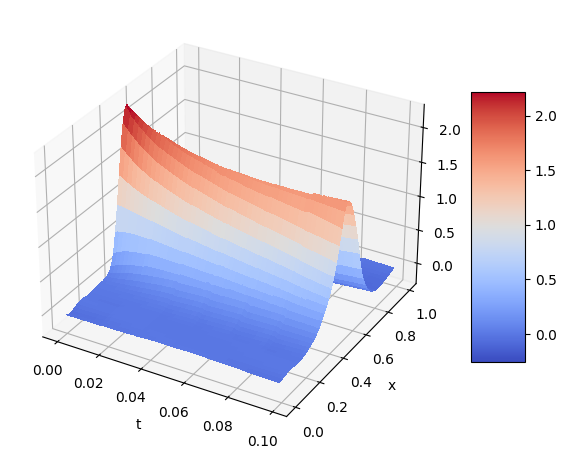

In [34]:
sol.plot2d()

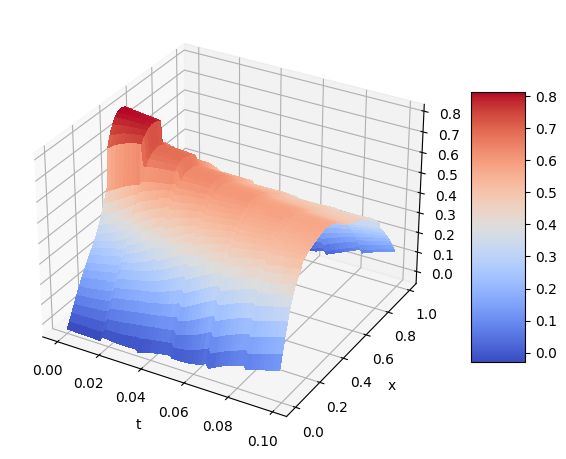

In [35]:
sol.plot2d(func_num=1)